<a href="https://colab.research.google.com/github/ahmed-alimi/Machine_Learning_colab/blob/main/Data_Science_skill_showcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease: Classification Problem

**Predicting Heart Disease using machine Learning.** 

This section looks into using various python-based machine learning and data science libraries in an attempt to build learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

**Approach:**

1.   Problem Definition
2.   Data
3.   Evaluation
4.   Features
5.   Modelling
6.   Experimentation









##1. Problem Definition

* Given clinical parameters about a patient, can we predict wether or not they have heart disease?

##2. Data

* The original dataset is from the UCI Machine Learning Repository : https://archive.ics.uci.edu/ml/datasets/heart+disease

* There is also a version available on Kaggle: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?select=heart.csv

**Context**

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.



##3. Evaluation

* If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project.

##4. Features

1. age- age in years
2. sex- (1=male; 0=female)
3. cp- chest pain type (4 values)
 *  0: Typical angina: chest pain related decrease blood supply to the heart.
  *  1: Atypical angina: chest pain not related to heart.
  *  2: Non-angina pain: typically esophageal spasms(not heart related).
  *  3: Asymptomatic: chest pain not showing signs of disease.

4. trestbps- resting blood pressure(in mm Hg, anything above 130-140 is typically cause for concern)
5. chol- serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl(1= true, 0= false)
7. resting electrocardiographic results (values 0,1,2)
8. thalach- maximum heart rate achieved
9. exang- exercise induced angina(1= yes; 0= no)
10. oldpeak- ST depression induced by exercise relative to rest
11. slope- the slope of the peak exercise ST segment
12. ca- number of major vessels (0-3) colored by flourosopy
13. thal- thalium stress result( 0,3 = normal; 1 = fixed defect; 2 = reversable defect)

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

14. **The target field(0 or 1)**

## Libraries and Tools



In [9]:
# Import needed tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics._plot.roc_curve import RocCurveDisplay


## Load Data

In [10]:
!wget https://raw.githubusercontent.com/ahmed-alimi/Datasets/main/heart.csv?token=GHSAT0AAAAAAB2ZPDKLPQEORYWIIO7OLO3UY3JAJ6A

--2022-11-07 13:05:43--  https://raw.githubusercontent.com/ahmed-alimi/Datasets/main/heart.csv?token=GHSAT0AAAAAAB2ZPDKLPQEORYWIIO7OLO3UY3JAJ6A
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38114 (37K) [text/plain]
Saving to: ‘heart.csv?token=GHSAT0AAAAAAB2ZPDKLPQEORYWIIO7OLO3UY3JAJ6A.1’

heart.csv?token=GHS 100%[===================>]  37.22K  --.-KB/s    in 0.003s  

2022-11-07 13:05:43 (10.5 MB/s) - ‘heart.csv?token=GHSAT0AAAAAAB2ZPDKLPQEORYWIIO7OLO3UY3JAJ6A.1’ saved [38114/38114]



In [11]:
df = pd.read_csv("/content/heart.csv?token=GHSAT0AAAAAAB2ZPDKLPQEORYWIIO7OLO3UY3JAJ6A")


## EDA(exploratory data analysis)

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. Do we have missing data and how do we deal with it?
4. Do we have outliers? What are the implications?
5. How can we add, change or remove features to get more out of the data?

### Inspect Data

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
df.thal.value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [14]:
df.shape

(1025, 14)

In [15]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### Explore

In [16]:
# Are we dealing with fairly balanced classes or not ?

df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

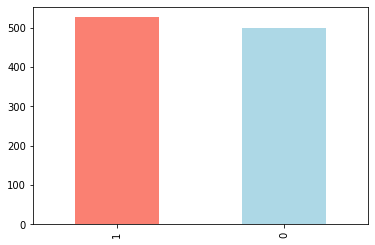

In [17]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [18]:
# check for missing values and dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [19]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###Summary Statistics

In [20]:
#Get Summary Statistics 

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Further Exploration & Analysis

In [21]:
# Explore patterns of relationship that exist, if any, between some of the features and the target

pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,86,226
1,413,300


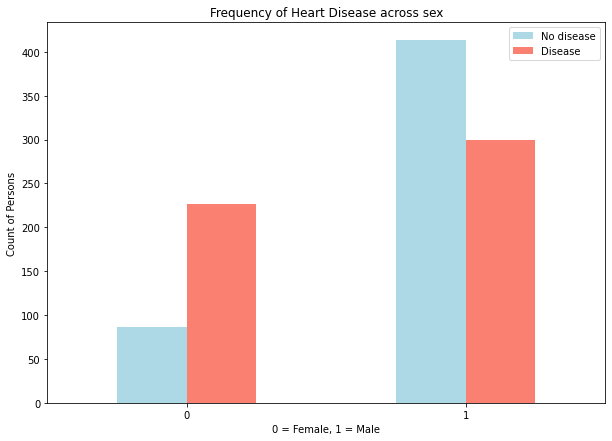

In [22]:
pd.crosstab(df.sex, df.target).plot(kind="bar",
                                    figsize=(10,7),
                                    color=["lightblue","salmon"])
plt.xlabel("0 = Female, 1 = Male")
plt.ylabel("Count of Persons")
plt.legend(["No disease", "Disease"])
plt.title("Frequency of Heart Disease across sex")
plt.xticks(rotation=0);

* We can infer from the above that there is a higher risk for someone having an heart disease if they are female than male

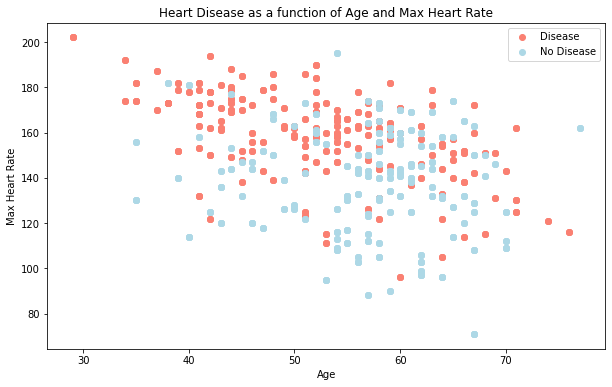

In [23]:
# Explore the combined effect of the "Age" and "Maximum Heart Rate" on the target

plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])
plt.title("Heart Disease as a function of Age and Max Heart Rate");

In [24]:
# Create a correlation matrix to compare all columns to each another

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


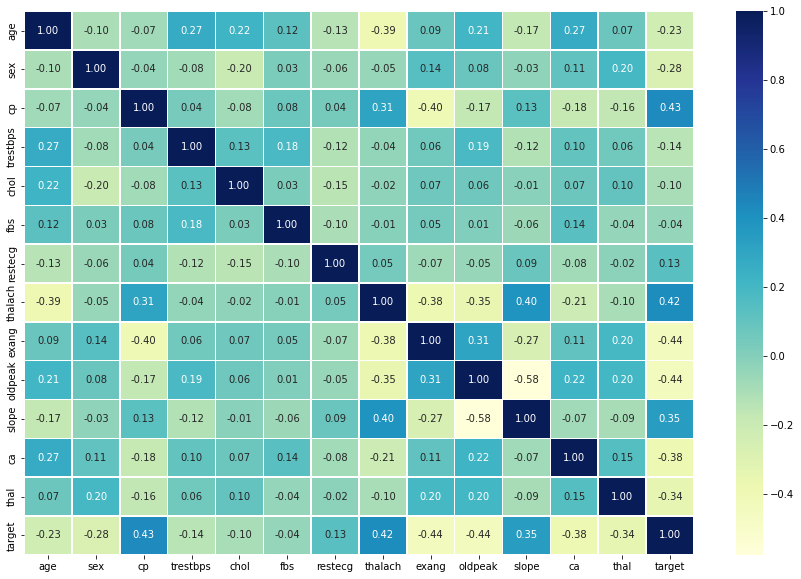

In [25]:
# Make the corr matrix easier to communicate

corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

##5. Modelling

### Prepare Data

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [27]:
# Split data into X(independent variables) and y(dependent variable)

X = df.drop("target", axis= 1)
y = df["target"]

In [28]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [29]:
len(X)

1025

In [30]:
y[:5], len(y)

(0    0
 1    0
 2    0
 3    0
 4    0
 Name: target, dtype: int64, 1025)

In [31]:
# Split data into training and test sets

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [32]:
len(X_train),len(y_train), len(X_test), len(y_test)

(820, 820, 205, 205)

### Experiments

We tried three different models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

#### Baseline

In [33]:
# Put models in a dictionary

models = {"Logistic Regression": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  Fits and evaluates given machine learning models.
  models: a dict of different Scikit-Learn machine learning models.
  X_train: training data (no labels)
  X_test: testing data (no labels)
  y_train: training labels
  y_test: test labels

  """
  # set random seed (for reproducable results)
  np.random.seed(42)

  # Make a dictionary to keep model scores
  model_scores = {}

  # Loop through models
  for name, model in models.items():
    # Fit model to the training data
    model.fit(X_train, y_train)
    # Evaluate model an append its score to model_scores
    model_score = model.score(X_test, y_test)
    model_scores.update({name:model_score})
  return model_scores  

##### Results

In [34]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.7951219512195122,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

**Model Comparison**

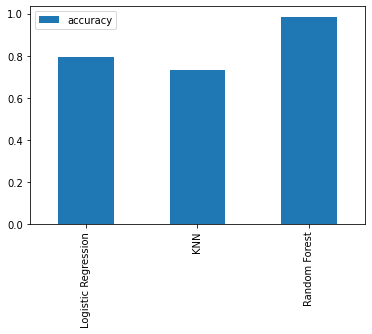

In [35]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

#### Model Tuning

We already achieved our goal with the  base line Random Forest model, socring above 95% i.e 98.54%

**But for completness sake, we would tune the Logistic Regression and KNN baseline models.**

#####Hyperparameter tuning

**Tune KNN**

The default value for n_neighbors parameter for the KNN model is "5", we experiment with a range of values from 1 to 20 here.

In [36]:
train_scores = []
test_scores = []

# create range of values for n_neighbors
neighbors = range(1, 21)

# Set up KNN instance
knn =KNeighborsClassifier()

# Loop through different n_neighbors values
for i in neighbors:
  knn.set_params(n_neighbors=i)

  # Fit model
  knn.fit(X_train, y_train)

  #update the training scores list
  train_scores.append(knn.score(X_train, y_train))

  #update the test scores list
  test_scores.append(knn.score(X_test, y_test))


Maximum KNN score on the test data: 98.54%


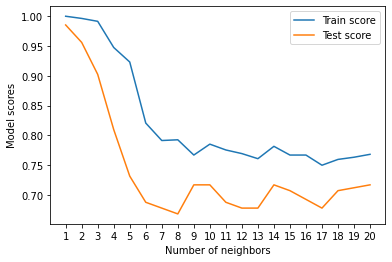

In [37]:
# Visualize results

plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model scores")
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

* The above shows that the best result on the test data was achieved when n_neighbors=1

In [38]:
knn =KNeighborsClassifier(n_neighbors=1)

In [39]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [40]:
print(f"{knn.score(X_test,y_test)*100:.2f}%")

98.54%


**Tune Logistic Regression using RandomizedSearchCV**

In [41]:
# create hyperparameter grid for LogisticRegression
log_reg_grid ={"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

# set up randomized hyperparameter search for LogisticRegression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit randomized search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [43]:
rs_log_reg.score(X_test,y_test)

0.7853658536585366

* There is really no visible improvement after tuning the Logistic Regression model unlike the KNN above.

* We therefore focus on the KNN and Random Forest models from here.

#### Further Evaluation

**Evaluating our models beyond accuracy**

 * ROC curve and AUC score
 * Confusion matrix
 * Classification Report

**ROC Curve**

The ROC curve is created by plotting the true positive rate against the false positive rate at various threshold settings.

In [44]:
# Make predictions with tuned KNN model
y_preds_KNN = knn.predict(X_test)

In [45]:
# Plot ROC curve and claculate the AUC metric for tuned KNN model
fpr,tpr,threshold = metrics.roc_curve(y_test, y_preds_KNN)

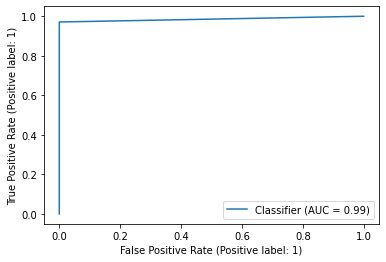

In [46]:
metrics.RocCurveDisplay.from_predictions(y_test, y_preds_KNN);

* The AUC for our tuned KNN model is 0.99 as seen above.
* A perfect model will achieve 1.0


In [47]:
# Re-instantiate the Random Forest baseline model

rf_baseline = RandomForestClassifier()

# Fit

rf_baseline.fit(X_train, y_train)

rf_baseline.score(X_test, y_test)

0.9853658536585366

In [48]:
# Make predictions with Random Forest model
y_preds_rf_baseline = rf_baseline.predict(X_test)

In [49]:
# Plot ROC curve and claculate the AUC metric for tuned KNN model
fpr,tpr,threshold = metrics.roc_curve(y_test, y_preds_rf_baseline)

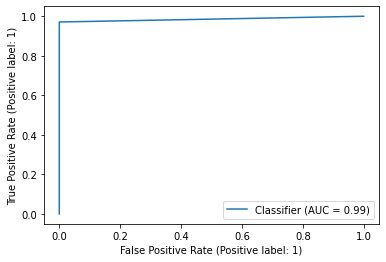

In [50]:
metrics.RocCurveDisplay.from_predictions(y_test, y_preds_rf_baseline);

**Confusion Matrix**

In [51]:
# KNN

print(confusion_matrix(y_test, y_preds_KNN))

[[102   0]
 [  3 100]]


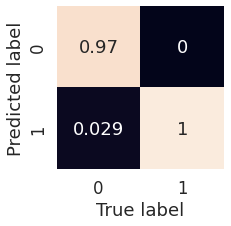

In [52]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
  """
  Plots a confusion matrix using Seaborn's heatmap()
  """
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds_KNN, normalize="pred"),
                   annot=True,
                   cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds_KNN)
  


In [53]:
# RandomForest

print(confusion_matrix(y_test, y_preds_rf_baseline))

[[102   0]
 [  3 100]]


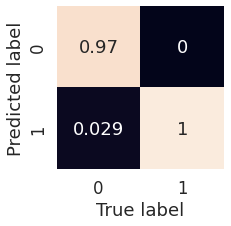

In [54]:
plot_conf_mat(y_test, y_preds_rf_baseline)

**Classification Report**

In [55]:
#KNN

print(classification_report(y_test, y_preds_KNN))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [56]:
#RandomForest

print(classification_report(y_test, y_preds_rf_baseline))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



**Calculate evaluation metrics using cross-validation**

We calculate precision, recall and f1-scores of our models below using cross-validation, as opposed to just the test set(which is 20% of the data).



* Accuracy

In [57]:
# Cross-validated accuracy KNN

cv_acc_KNN = cross_val_score(knn,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc_KNN

array([0.98536585, 0.98536585, 0.97073171, 0.97073171, 1.        ])

In [58]:
cv_acc_KNN = np.mean(cv_acc_KNN)
print(f"{(cv_acc_KNN)*100:.2f}%")

98.24%


In [59]:
# Cross-validated accuracy RandomForest

cv_acc_rf = cross_val_score(rf_baseline,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc_rf

array([1.        , 1.        , 1.        , 1.        , 0.98536585])

In [60]:
cv_acc_rf = np.mean(cv_acc_rf)
print(f"{(cv_acc_rf)*100:.2f}%")

99.71%


* Precision

In [61]:
# Cross-validated precision KNN

cv_pre_KNN = cross_val_score(knn,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_pre_KNN

array([1.        , 1.        , 0.97142857, 1.        , 1.        ])

In [62]:
cv_pre_KNN = np.mean(cv_pre_KNN)
print(f"{(cv_pre_KNN)*100:.2f}%")

99.43%


In [63]:
# Cross-validated precision RandomForest

cv_pre_rf = cross_val_score(rf_baseline,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_pre_rf

array([1.        , 1.        , 1.        , 1.        , 0.97247706])

In [64]:
cv_pre_rf = np.mean(cv_pre_rf)
print(f"{(cv_pre_rf)*100:.2f}%")

99.45%


In [65]:
# Cross-validated recall KNN

cv_rec_KNN = cross_val_score(knn,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_rec_KNN

array([0.97142857, 0.97142857, 0.97142857, 0.94285714, 1.        ])

In [66]:
cv_rec_KNN = np.mean(cv_rec_KNN)
print(f"{(cv_rec_KNN)*100:.2f}%")

97.14%


In [67]:
# Cross-validated recall RandomForest

cv_rec_rf = cross_val_score(rf_baseline,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_rec_rf

array([1., 1., 1., 1., 1.])

In [68]:
cv_rec_rf = np.mean(cv_rec_rf)
print(f"{(cv_rec_rf)*100:.2f}%")

100.00%


In [69]:
# Cross-validated f1-score KNN

cv_f1_KNN = cross_val_score(knn,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1_KNN

array([0.98550725, 0.98550725, 0.97142857, 0.97058824, 1.        ])

In [70]:
cv_f1_KNN = np.mean(cv_f1_KNN)
print(f"{(cv_f1_KNN)*100:.2f}%")

98.26%


In [71]:
# Cross-validated f1-score RandomForest

cv_f1_rf = cross_val_score(rf_baseline,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1_rf

array([1.        , 1.        , 1.        , 1.        , 0.98604651])

In [72]:
cv_f1_rf = np.mean(cv_f1_rf)
print(f"{(cv_f1_rf)*100:.2f}%")

99.72%


* Visualize cross-validated metrics

In [73]:
cv_metrics = pd.DataFrame({"Accuracy":[cv_acc_KNN, cv_acc_rf],
                           "Precision":[cv_pre_KNN, cv_pre_rf],
                           "Recall":[cv_rec_KNN, cv_rec_rf],
                           "F1":[cv_f1_KNN, cv_f1_rf]},
                          index=["KNN","RF"],
                          )

In [74]:
cv_metrics

,Accuracy,Precision,Recall,F1
KNN,0.982439,0.994286,0.971429,0.982606
RF,0.997073,0.994495,1.000000,0.997209


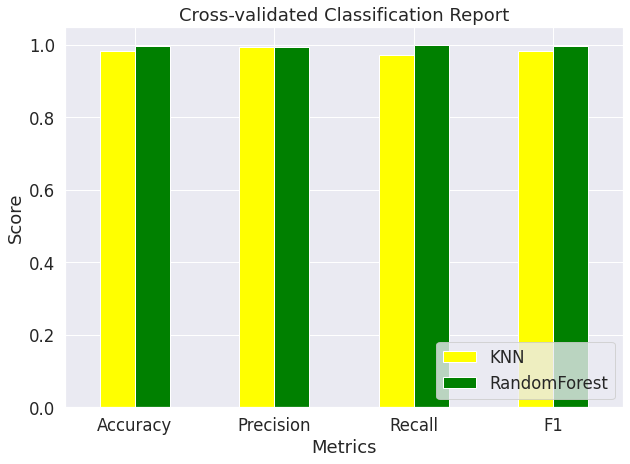

In [75]:
cv_metrics.T.plot(kind="bar",
                figsize=(10,7),
                color=["yellow","green"])
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.legend(["KNN", "RandomForest"], loc="lower right")
plt.title("Cross-validated Classification Report")
plt.xticks(rotation=0);

#### Feature Importance

* Which features contributed the most to the outcomes of the models and how did the contribute?

In [76]:
rf_baseline.feature_importances_

array([0.07997139, 0.0285641 , 0.14091033, 0.06777202, 0.08204241,
       0.00783783, 0.0194605 , 0.11537354, 0.05276234, 0.11192506,
       0.04054226, 0.11917869, 0.13365953])

In [77]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [78]:
# Map feature importances to column names

feature_dict_rf = dict(zip(df.columns, rf_baseline.feature_importances_))

feature_dict_rf

{'age': 0.07997139446082725,
 'sex': 0.02856410432599002,
 'cp': 0.14091032770144007,
 'trestbps': 0.0677720229627953,
 'chol': 0.08204240505421997,
 'fbs': 0.007837827488275408,
 'restecg': 0.019460501886780054,
 'thalach': 0.11537353646885451,
 'exang': 0.052762335360084185,
 'oldpeak': 0.1119250581010469,
 'slope': 0.04054226116546226,
 'ca': 0.11917869113507078,
 'thal': 0.1336595338891533}

In [79]:
# Visualize

feature_df = pd.DataFrame(feature_dict_rf, index= [0])

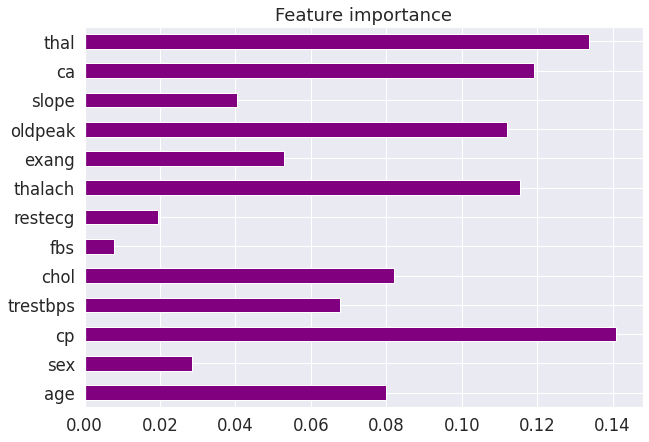

In [86]:
feature_df.T.plot.barh(title="Feature importance",legend=False, figsize=(10,7), color=["purple"]);

In [81]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Conclusion

## Recommendations